In [54]:
%matplotlib inline

import pandas
import seaborn

import pgdata

db = pgdata.connect()

# Get all salmon records that aren't in waterbodies
# This returns a record for every location/species combination
sql = """SELECT 
           fish_obsrvtn_distinct_id,
           edge_description,
           waterbody_type,
           vertex_from_elevation,
           vertex_to_elevation,
           vertex_length,
           vertex_slope,
           segment_from_elevation,
           segment_to_elevation,
           segment_length,
           segment_slope,
           species_code,
           species_name
         FROM temp.obs_spp_by_slope 
         WHERE (waterbody_type NOT IN ('X', 'L', 'W') OR waterbody_type IS NULL)
         AND species_code IN ('CH', 'CM', 'CO', 'PK', 'SK')
         AND edge_type in (1000, 1050, 1100, 1150, 2000)
         ORDER BY fish_obsrvtn_distinct_id, species_code
"""
all_spp = pandas.read_sql_query(sql, db.engine)

In [55]:
all_spp.head()

,fish_obsrvtn_distinct_id,edge_description,waterbody_type,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,species_code,species_name
0,15,"Single line blueline, main flow",None,405.85,405.85,14.90,0.00,405.851,409.000,865.07,0.36,SK,Sockeye Salmon
1,16,"Single line blueline, main flow",None,405.85,405.85,14.90,0.00,405.851,409.000,865.07,0.36,CH,Chinook Salmon
2,17,"Single line blueline, secondary flow",None,446.91,446.91,3.66,0.00,446.909,446.909,631.87,0.00,CH,Chinook Salmon
3,17,"Single line blueline, secondary flow",None,446.91,446.91,3.66,0.00,446.909,446.909,631.87,0.00,SK,Sockeye Salmon
4,22,"Single line blueline, main flow",None,427.00,427.35,17.08,2.05,427.000,452.000,339.11,7.37,CH,Chinook Salmon


In [56]:
all_spp.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,13571.000000,13571.000000,13571.000000,13571.000000,13571.000000,13571.000000,13571.000000,13571.00000,13571.000000
mean,21943.712180,154.127261,155.470695,13.675714,16.293924,154.127306,214.049661,1087.38682,5.236215
std,16988.510925,254.869540,254.466513,10.453587,49.243028,254.869530,277.752304,988.78299,8.129571
min,15.000000,1.000000,1.000000,0.920000,0.000000,1.000000,1.000000,1.54000,0.000000
25%,7301.500000,6.000000,8.315000,6.930000,0.000000,6.000000,29.000000,408.05500,1.040000
50%,18329.000000,31.500000,32.000000,11.920000,2.490000,31.500000,84.000000,811.16000,2.700000
75%,34209.500000,152.500000,153.070000,18.560000,12.360000,152.500000,292.000000,1444.89000,6.165000
max,63929.000000,1899.000000,1901.340000,209.310000,1345.190000,1899.000000,2157.000000,7928.88000,347.660000


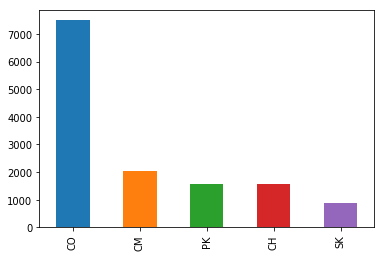

In [57]:
# how many unique locations per spp?
pandas.value_counts(all_spp['species_code']).plot.bar()

In [58]:
# create a data frame of unique locations and describe
unique_pts = all_spp.drop_duplicates('fish_obsrvtn_distinct_id')
unique_pts.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000
mean,22743.623854,169.297935,170.521104,13.582403,15.262850,169.297986,231.666943,1129.522629,5.255031
std,16997.722383,265.470026,265.132129,10.573238,49.939663,265.470019,288.081797,1005.759419,8.384033
min,15.000000,1.000000,1.000000,0.920000,0.000000,1.000000,1.000000,1.540000,0.000000
25%,8209.250000,7.500000,9.000000,6.660000,0.000000,7.500000,32.500000,434.120000,0.990000
50%,19733.000000,36.000000,37.000000,11.730000,2.010000,36.000000,93.000000,850.530000,2.670000
75%,36876.500000,197.075000,198.112500,18.430000,11.200000,197.075000,336.000000,1503.240000,6.150000
max,63929.000000,1899.000000,1901.340000,209.310000,1345.190000,1899.000000,2157.000000,7928.880000,347.660000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116fe9080>]],
      dtype=object)

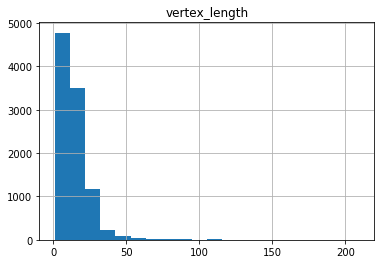

In [59]:
# plot histogram of vertex_lengths
unique_pts.hist(column='vertex_length', bins=20)


In [63]:
# try removing all records where vertex_length < 2m
unique_subset1 = unique_pts[unique_pts['vertex_length'] >= 2]
unique_subset1.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000
mean,22677.154578,167.735260,168.972168,14.184286,12.343696,167.735313,230.185516,1130.158887,5.235666
std,16935.787308,264.767571,264.438498,10.462475,30.080855,264.767568,287.742419,1011.034997,7.677842
min,15.000000,1.000000,1.000000,2.020000,0.000000,1.000000,1.000000,11.330000,0.000000
25%,8189.000000,7.000000,9.000000,7.160000,0.000000,7.000000,32.500000,429.330000,0.980000
50%,19672.000000,35.750000,36.000000,12.230000,2.020000,35.750000,92.000000,849.720000,2.680000
75%,36872.000000,191.000000,191.830000,18.920000,10.720000,191.000000,331.000000,1505.310000,6.150000
max,63922.000000,1899.000000,1901.340000,209.310000,476.010000,1899.000000,2157.000000,7928.880000,97.080000


In [64]:
# from that, retain only records where vertex slope <= 100
unique_subset2 = unique_subset1[unique_subset1['vertex_slope'] <= 100]
unique_subset2.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000
mean,22819.742823,170.319639,171.425908,14.390019,8.939901,170.319695,232.483670,1133.714608,5.143638
std,17013.045430,265.789029,265.512934,10.476230,16.263093,265.789025,288.767859,1010.373720,7.552852
min,15.000000,1.000000,1.000000,2.020000,0.000000,1.000000,1.000000,12.230000,0.000000
25%,8196.000000,8.000000,9.020000,7.300000,0.000000,8.000000,33.000000,431.720000,0.970000
50%,19732.000000,37.000000,38.000000,12.620000,1.810000,37.000000,93.000000,853.690000,2.610000
75%,37047.000000,198.960000,199.740000,19.010000,9.850000,198.965000,336.000000,1507.680000,6.050000
max,63922.000000,1899.000000,1901.340000,209.310000,99.650000,1899.000000,2157.000000,7928.880000,72.870000


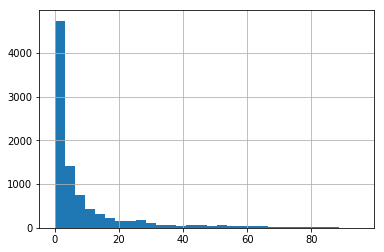

In [65]:
# for remaining records, check distribution of the difference between the two values
diff = unique_subset2['vertex_slope'] - unique_subset2['segment_slope']
diff = diff.abs()
diff.hist(bins=30)

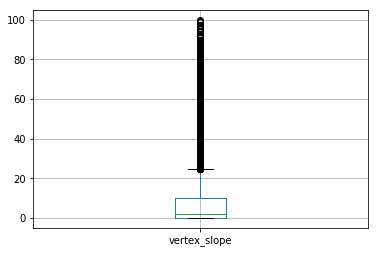

In [66]:
# try a box plot for all species
unique_subset2.boxplot(column=['vertex_slope'])

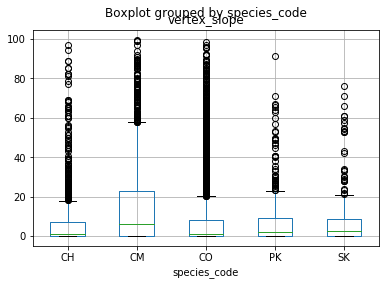

In [68]:
# try boxplot of all spp
unique_subset2.boxplot(column='vertex_slope', by='species_code')

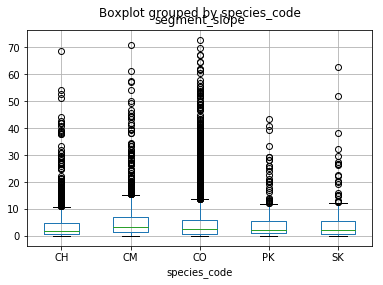

In [69]:
# try the same using the slope of the entire segment
unique_subset2.boxplot(column='segment_slope', by='species_code')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


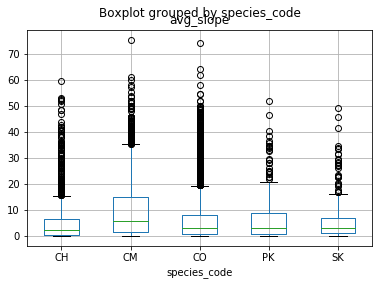

In [70]:
# try averaging the slope values
unique_subset2['avg_slope'] = (unique_subset2['vertex_slope'] + unique_subset2['segment_slope']) / 2
unique_subset2.boxplot(column='avg_slope', by='species_code')